In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../src/')

from astropy.table import Table
import galhalo
import os
import warnings; warnings.simplefilter('ignore')


$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 



------------------------------




$\sigma(M_{peak}) = \sigma_0 + \gamma \left( \log_{10} (M_{peak}) − \log_{10}( M_1 ) \right)$ for the increasing scatter!

In [3]:
def dex(value):
    
    #10^(0.1) = 0.1 dex
    
    return 10**(value)

In [4]:
def single_samp(lgMv, dex):

    log_e = -1.5
    a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5
    scatter = np.random.normal(loc=0, scale=dex, size=(lgMs.shape[0])) # the standard normal PDF
    return (lgMs + scatter)- (dex**2)/4.605

In [5]:
halo_masses = np.log10(np.logspace(8, 13, 100)) # just for the model

stellar_masses = galhalo.lgMs_D22_det(halo_masses) 

stellar_masses_15 = single_samp(halo_masses, 0.1) 

stellar_masses_5 = single_samp(halo_masses, 0.5) 

stellar_masses_2 = single_samp(halo_masses, 1) 

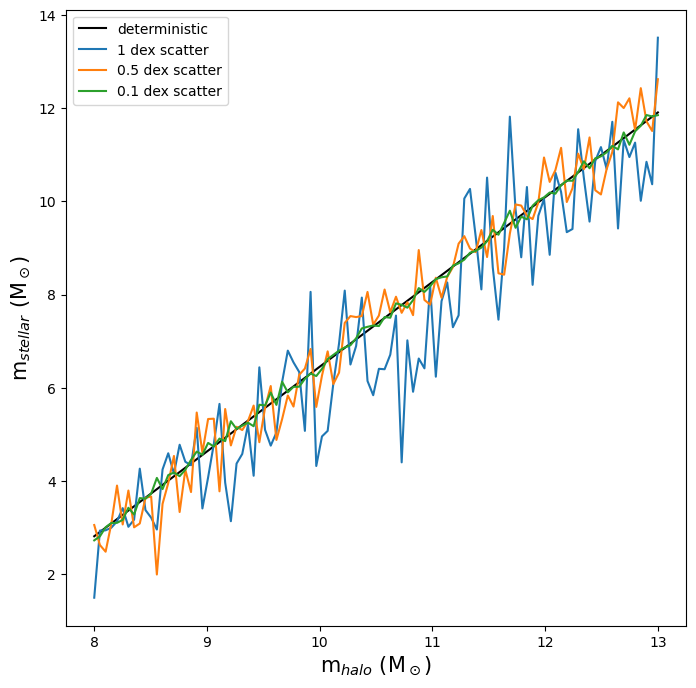

In [6]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses, color="black", label="deterministic")

plt.plot(halo_masses, stellar_masses_2, label="1 dex scatter")
plt.plot(halo_masses, stellar_masses_5, label="0.5 dex scatter")
plt.plot(halo_masses, stellar_masses_15, label="0.1 dex scatter")


plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
#plt.savefig("../figures/SHMR_scatter.png")
plt.show()

In [7]:
stellar_masses_RP = galhalo.lgMs_RP17(halo_masses, 0)
stellar_masses_B = galhalo.lgMs_B13(halo_masses,0)

stellar_masses_RP_1 = galhalo.lgMs_RP17(halo_masses, 0.5)
stellar_masses_B_1 = galhalo.lgMs_B13(halo_masses,0.5)

stellar_masses_RP_2 = galhalo.lgMs_RP17(halo_masses, 1)
stellar_masses_B_2 = galhalo.lgMs_B13(halo_masses,1)

stellar_masses_RP_3 = galhalo.lgMs_RP17(halo_masses, 1.5)
stellar_masses_B_3 = galhalo.lgMs_B13(halo_masses,1.5)

stellar_masses_RP_4 = galhalo.lgMs_RP17(halo_masses, 2)
stellar_masses_B_4 = galhalo.lgMs_B13(halo_masses,2)

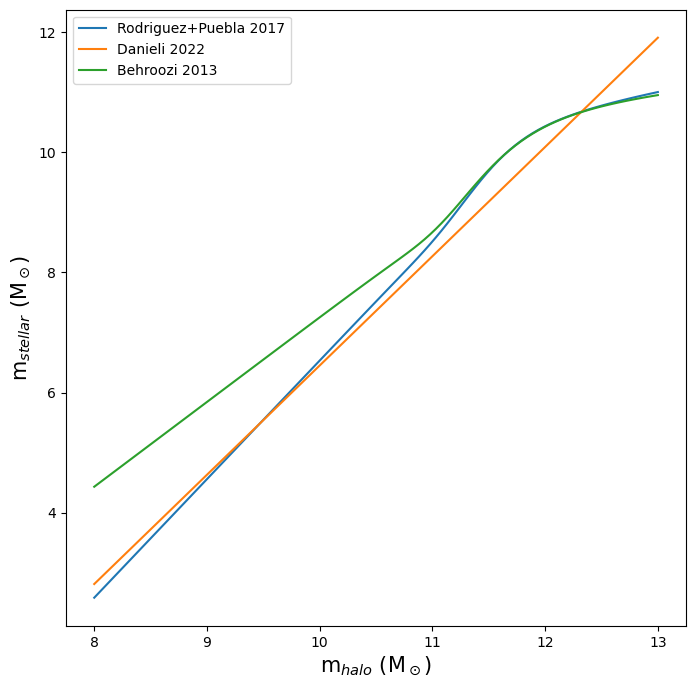

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [9]:
dM = 0.1

dMs_dM_B = np.gradient(galhalo.lgMs_B13(halo_masses,0), dM)
dMs_dM_RP = np.gradient(galhalo.lgMs_RP17(halo_masses,0), dM)

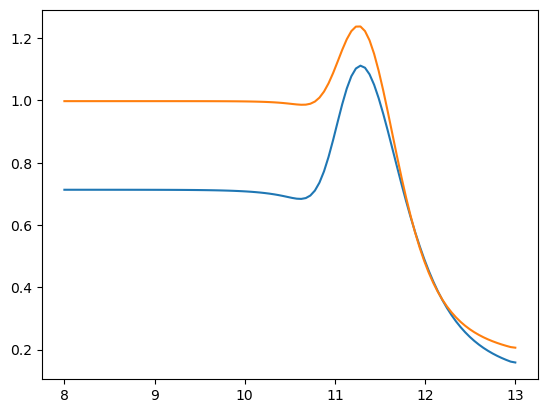

In [10]:
plt.plot(halo_masses, dMs_dM_B)
plt.plot(halo_masses, dMs_dM_RP)
plt.show()

In [11]:
slope_diff = dMs_dM_RP - dMs_dM_B

anchor_ind =  np.where(slope_diff == np.min(slope_diff))[0][0]

anchor_point = (halo_masses[anchor_ind], stellar_masses_B[anchor_ind])

In [12]:
anchor_point

(11.98989898989899, 10.418376426871244)

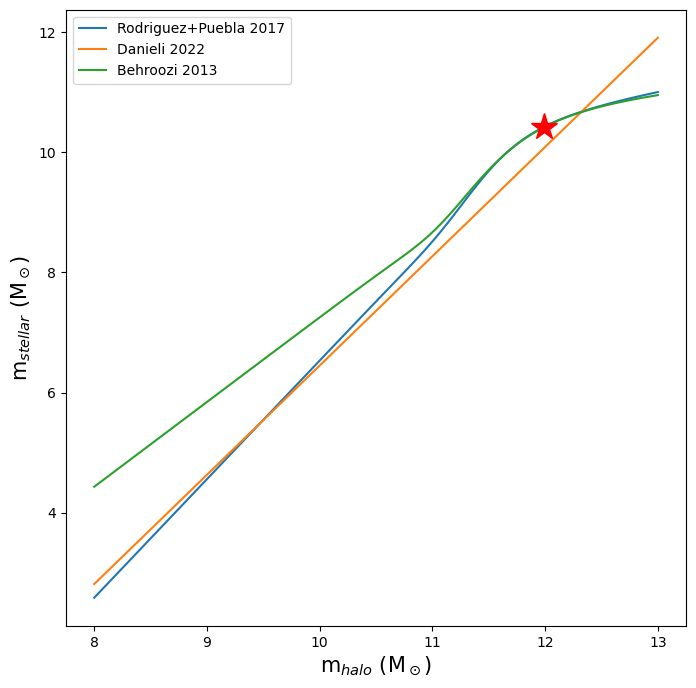

In [13]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_RP, label="Rodriguez+Puebla 2017")
plt.plot(halo_masses, stellar_masses, label="Danieli 2022")
plt.plot(halo_masses, stellar_masses_B, label="Behroozi 2013")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)

plt.plot(anchor_point[0], anchor_point[1], marker="*", color="red", markersize=20)

plt.legend()
plt.show()

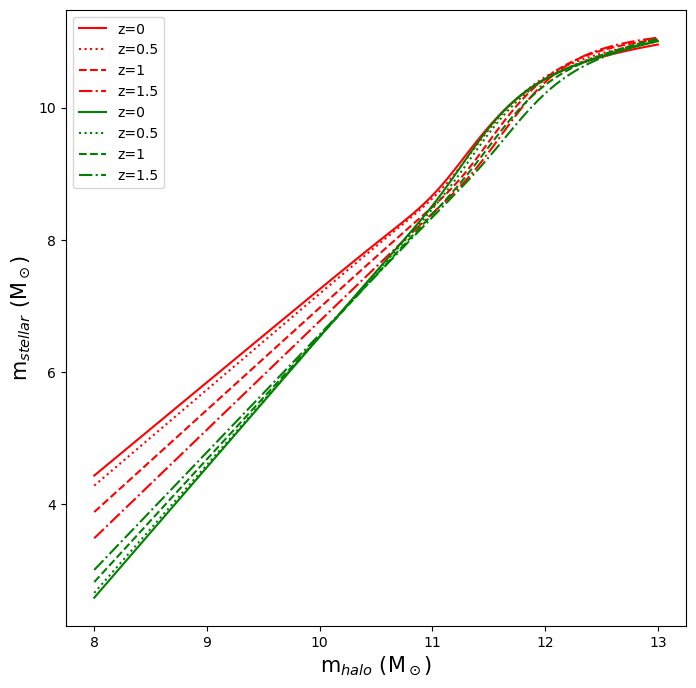

In [14]:
plt.figure(figsize=(8, 8))

plt.plot(halo_masses, stellar_masses_B, label="z=0", color="red")
plt.plot(halo_masses, stellar_masses_B_1, label="z=0.5", color="red", ls=":")
plt.plot(halo_masses, stellar_masses_B_2, label="z=1", color="red", ls="--")
plt.plot(halo_masses, stellar_masses_B_3, label="z=1.5", color="red", ls="-.")

plt.plot(halo_masses, stellar_masses_RP, label="z=0", color="green")
plt.plot(halo_masses, stellar_masses_RP_1, label="z=0.5", color="green", ls=":")
plt.plot(halo_masses, stellar_masses_RP_2, label="z=1", color="green", ls="--")
plt.plot(halo_masses, stellar_masses_RP_3, label="z=1.5", color="green", ls="-.")

plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()

plt.show()

In [15]:
def new_relation(lgMv, alpha, anchor_point):

    intercept = anchor_point[1] - alpha*anchor_point[0]

    return (lgMv*alpha) + intercept

    # quadratic = gamma**2

    # #scatter = powerlaw + sigma

    # return np.log10(powerlaw+quadratic)



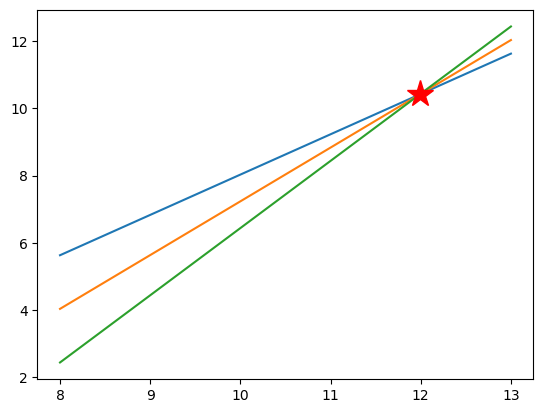

In [16]:
plt.plot(halo_masses, new_relation(halo_masses, 1.2, anchor_point))
plt.plot(halo_masses, new_relation(halo_masses, 1.6, anchor_point))
plt.plot(halo_masses, new_relation(halo_masses, 2, anchor_point))

plt.plot(anchor_point[0], anchor_point[1], marker="*", color="red", markersize=20)
plt.show()

In [17]:
# from matplotlib.widgets import Slider, Button
# %matplotlib widget


# # The parametrized function to be plotted

# def SHMR_params(lgMv, red, gamma_s, gamma_i):

#     red_dep = 1+np.nanmean(red)
#     a = 1.82*red_dep**gamma_s
#     log_e = -1.5*red_dep**gamma_i
#     lgMs = log_e + 12.5 + a*lgMv - a*12.5

#     return lgMs

# # Define initial parameters
# init_gamma_s = 0
# init_gamma_i = 0

# # Create the figure and the line that we will manipulate

# fig, ax = plt.subplots()
# line, = ax.plot(halo_mass, SHMR_params(halo_mass, red, init_gamma_s, init_gamma_i))
# plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)

# # adjust the main plot to make room for the sliders
# fig.subplots_adjust(left=0.25, bottom=0.25)

# # Make a horizontal slider to control the frequency.
# axslope = fig.add_axes([0.25, 0.1, 0.65, 0.03])
# slope_slider = Slider(
#     ax=axslope,
#     label='slope',
#     valmin=-0.25,
#     valmax=0.25,
#     valinit=init_gamma_s,
# )

# # Make a vertically oriented slider to control the amplitude
# axintercept = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
# intercept_slider = Slider(
#     ax=axintercept,
#     label="intercept",
#     valmin=-0.5,
#     valmax=0.5,
#     valinit=init_gamma_i,
#     orientation="vertical"
# )


# # The function to be called anytime a slider's value changes
# def update(val):
#     line.set_ydata(SHMR_params(halo_mass, red, slope_slider.val, intercept_slider.val))
#     fig.canvas.draw_idle()


# # register the update function with each slider
# slope_slider.on_changed(update)
# intercept_slider.on_changed(update)

# # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


# def reset(event):
#     slope_slider.reset()
#     intercept_slider.reset()
# button.on_clicked(reset)

# plt.show()

In [19]:
def new_param(Mh, a, d):

    M_star_a = 10**10.41
    M_halo_a = 10**11.98

    M_norm = Mh/M_halo_a

    return np.log(M_star_a) + a*np.log10(M_norm) + d*np.log10(M_norm)**2

In [28]:
halo_masses = np.logspace(5,11,100)

stelar_masses = new_param(halo_masses, 1.8, 0)

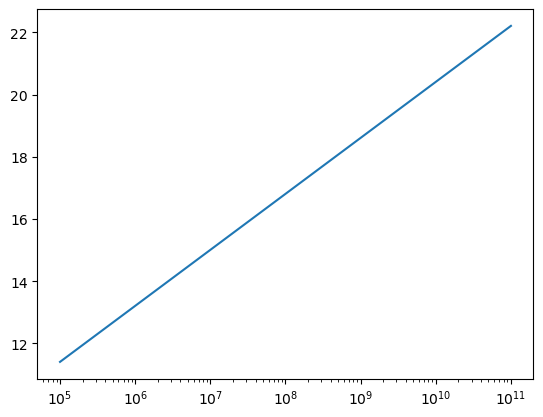

In [29]:
plt.plot(halo_masses, stelar_masses)
plt.xscale("log")
plt.show()

In [30]:
galhalo.lgMs_D22_det(halo_masses)

array([1.81988250e+05, 2.09244023e+05, 2.40581539e+05, 2.76612067e+05,
       3.18038419e+05, 3.65668656e+05, 4.20431855e+05, 4.83396226e+05,
       5.55789953e+05, 6.39025146e+05, 7.34725391e+05, 8.44757418e+05,
       9.71267510e+05, 1.11672337e+06, 1.28396227e+06, 1.47624636e+06,
       1.69732634e+06, 1.95151459e+06, 2.24376932e+06, 2.57979123e+06,
       2.96613477e+06, 3.41033596e+06, 3.92105939e+06, 4.50826722e+06,
       5.18341353e+06, 5.95966773e+06, 6.85217142e+06, 7.87833378e+06,
       9.05817114e+06, 1.04146974e+07, 1.19743729e+07, 1.37676208e+07,
       1.58294201e+07, 1.81999882e+07, 2.09255656e+07, 2.40593172e+07,
       2.76623700e+07, 3.18050051e+07, 3.65680289e+07, 4.20443488e+07,
       4.83407859e+07, 5.55801585e+07, 6.39036778e+07, 7.34737024e+07,
       8.44769050e+07, 9.71279143e+07, 1.11673501e+08, 1.28397390e+08,
       1.47625799e+08, 1.69733797e+08, 1.95152623e+08, 2.24378095e+08,
       2.57980286e+08, 2.96614640e+08, 3.41034759e+08, 3.92107102e+08,
      